In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')

from server2022.src.train_val import *
from server2022.src.model import *
from server2022.data.processed.prepare_data import *

In [2]:
# agents2019 = pd.read_csv('../data/raw/agents2019.csv', index_col='Unnamed: 0')
# agents2020 = pd.read_csv('../data/raw/agents2020.csv')
# for c in [col for col in agents2020.columns if 'Факт' in col]:
#     agents2020[c] = agents2020[c].apply(lambda x: float(x) if x not in ['Х', 'Н/Д'] else np.nan)
# agents2021 = pd.read_csv('../data/raw/agents2021.csv', index_col='Unnamed: 0')

# cbr = pd.read_csv('../data/raw/cbr.csv')
# inflation = pd.read_csv('../data/raw/inflation.csv')

In [28]:
#df = create_df_0years_known()
df = create_df_1year_known()

In [30]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]
df = df.fillna(0)

In [31]:
df.head()

,Наименование ДП,Итого,"-4, Нематериальные активы, RUB","-3, Нематериальные активы, RUB","-2, Нематериальные активы, RUB","-1, Нематериальные активы, RUB","-4, Основные средства , RUB","-3, Основные средства , RUB","-2, Основные средства , RUB","-1, Основные средства , RUB","-4, Внеоборотные активы, RUB","-3, Внеоборотные активы, RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-4, Дебиторская задолженность, RUB","-3, Дебиторская задолженность, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-4, Оборотные активы, RUB","-3, Оборотные активы, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-4, Уставный капитал , RUB","-3, Уставный капитал , RUB","-2, Уставный капитал , RUB","-1, Уставный капитал , RUB","-4, Капитал и резервы, RUB","-3, Капитал и резервы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-4, Заёмные средства (долгосрочные), RUB","-3, Заёмные средства (долгосрочные), RUB","-2, Заёмные средства (долгосрочные), RUB","-1, Заёмные средства (долгосрочные), RUB","-4, Долгосрочные обязательства, RUB","-3, Долгосрочные обязательства, RUB","-2, Долгосрочные обязательства, RUB","-1, Долгосрочные обязательства, RUB","-4, Заёмные средства (краткосрочные), RUB","-3, Заёмные средства (краткосрочные), RUB","-2, Заёмные средства (краткосрочные), RUB","-1, Заёмные средства (краткосрочные), RUB","-4, Кредиторская задолженность, RUB","-3, Кредиторская задолженность, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-4, Краткосрочные обязательства, RUB","-3, Краткосрочные обязательства, RUB","-2, Краткосрочные обязательства, RUB","-1, Краткосрочные обязательства, RUB","-4, Выручка, RUB","-3, Выручка, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-4, Себестоимость продаж, RUB","-3, Себестоимость продаж, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-4, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-4, Прибыль (убыток) от продажи, RUB","-3, Прибыль (убыток) от продажи, RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.","Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,прирост за -2 год","Внеоборотные активы ,прирост за -1 год","Дебиторская задолженность ,прирост за -3 год","Дебиторская задолженность ,прирост за -2 год","Дебиторская задолженность ,прирост за -1 год","Оборотные активы ,прирост за -3 год","Оборотные активы ,прирост за -2 год","Оборотные активы ,прирост за -1 год","Уставный капитал ,прирост за -3 год","Уставный капитал ,прирост за -2 год","Уставный капитал ,прирост за -1 год","Капитал и резервы ,прирост за -3 год","Капитал и резервы ,прирост за -2 год","Капитал и резервы ,прирост за -1 год","Заёмные средства (долгосрочные) ,прирост за -3 год","Заёмные средства (долгосрочные) ,прирост за -2 год","Заёмные средства (долгосрочные) ,прирост за -1 год","Долгосрочные обязательства ,прирост за -3 год","Долгосрочные обязательства ,прирост за -2 год","Долгосрочные обязательства ,прирост за -1 год",...,"Прибыль (убыток) до налогообложения ,прирост за -1 год","Прибыль (убыток) от продажи ,прирост за -3 год","Прибыль (убыток) от продажи ,прирост за -2 год","Прибыль (убыток) от продажи ,прирост за -1 год","Нематериальные активы, относительный прирост за -4 год","Нематериальные активы, прирост относительно выручки за -4 год","Нематериальные активы, относительный прирост за -3 год

Fitting model <catboost.core.CatBoostClassifier object at 0x000001505472E2E0> with treshold = 0.5...


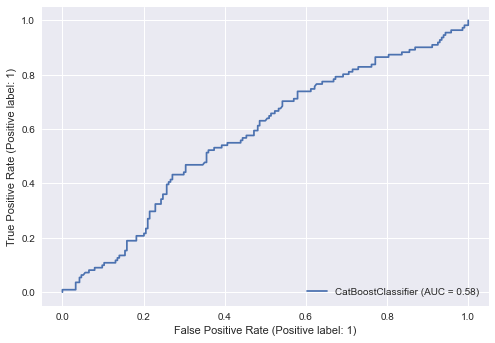

Validate predictions...


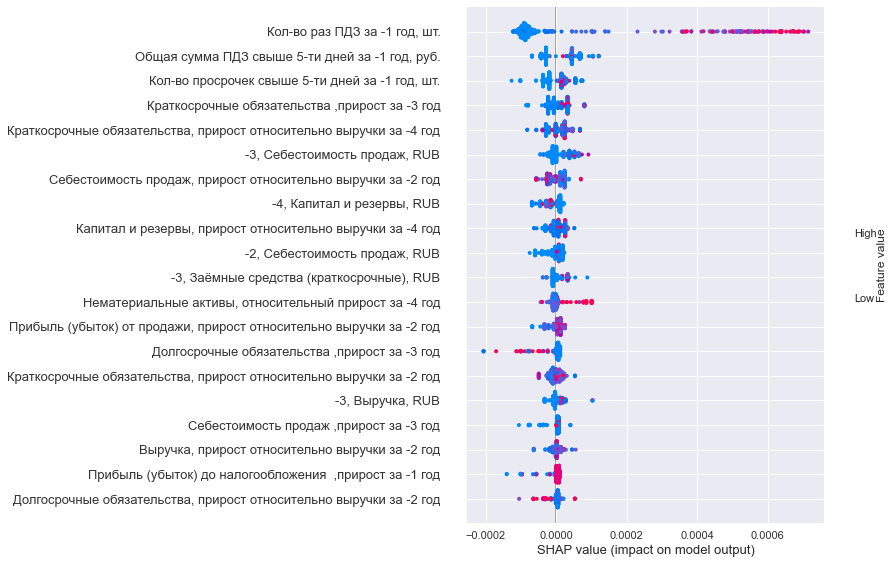

F1 = 0.4988, Precision = 0.3365, Recall = 0.964, Accuracy = 0.3385, ROC_AUC = 0.5758
4


In [45]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           l2_leaf_reg=5, 
                           learning_rate=1e-4,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[1, (df.shape[0] - df.binary_target.sum()) / df.binary_target.sum()],
                           # cat_features=cat_features
                          )

# model = RandomForestClassifier(n_estimators=30)
make_report(model, df, treshold=0.5, to_file=False, file_path='../reports/report_petr.csv')
print(model.best_iteration_)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.1...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.15...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.2...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.25...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.3...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.35...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.4...
Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.45...
Validate predictions

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.65...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.7...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.75...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.8...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.85...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.9...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...
Fitting model <catboost.core.CatBoostClassifier object at 0x0000015050725B50> with treshold = 0.95...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Validate predictions...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


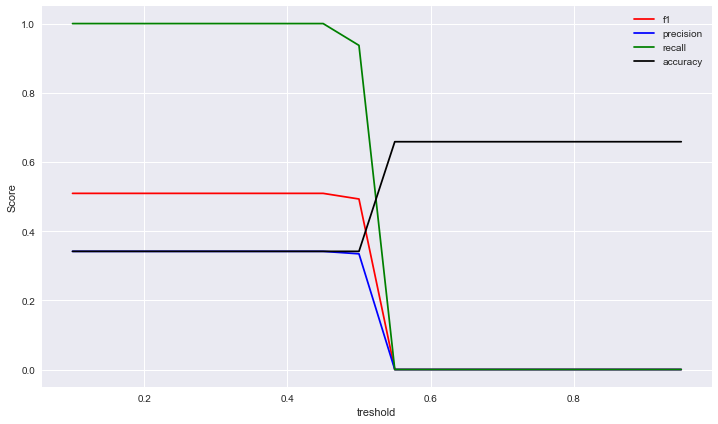

In [27]:
model = CatBoostClassifier(iterations=100,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-5,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='AUC',
                           verbose=False,
                           # class_weights=[len(np.where(y_train == 1)[0]) / len(np.where(y_train == 0)[0]), 1],
                           # cat_features=cat_features
                          )

validate_treshold(model, df)